In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

In [29]:
with open('polygon_api.txt', 'r') as file:
    lines = file.readlines()
POLYGON_API_KEY = lines[0].strip()
POLYGON_KEY_ID = lines[1].strip()

HEADERS = {
    'Authorization': 'Bearer ' + POLYGON_API_KEY
}
BASE_URL = 'https://api.polygon.io/v2/aggs/'


In [30]:
print(POLYGON_API_KEY)

i5Wfw1_WbvHpBnNgw8jGHELC7rZBEDmp


In [84]:
def get_fx_pairs_data(pg_tickers):
    start = '2023-01-01'
    end = '2023-12-01'
    multiplier = '1'
    timespan = 'minute'
    fx_url = f"range/{multiplier}/{timespan}/{start}/{end}?adjusted=true&sort=asc&limit=50000"
    fx_pairs_dict = {}
    for pair in pg_tickers:
        response = requests.get(
            f"{BASE_URL}ticker/{pair}/{fx_url}", 
            headers=HEADERS
        )
        # print(response)
        response = response.json()
        fx_pairs_dict[pair] = pd.DataFrame(response['results'])
    return fx_pairs_dict

def format_fx_pairs(fx_pair_dict):
    for pair in fx_pairs_dict.keys():
        fx_pairs_dict[pair]['t'] = pd.to_datetime(fx_pairs_dict[pair]['t'],unit='ms')
        fx_pairs_dict[pair] = fx_pairs_dict[pair].set_index('t')
    return fx_pairs_dict

def create_str_index(series):
    fx_pair_str_ind = {}
    for pair in series.keys():
        fx_pair_str_ind[pair] = series[pair].set_index(
            series[pair].index.to_series().dt.strftime(
                '%Y-%m-%d-%H-%M-%S'
            )
        )
    return fx_pair_str_ind 

def create_returns_series(series):
    for pair in series.keys():
        series[pair]['rets'] = series[pair]['c'].pct_change()
    return series 

def plot_returns_series(series):
    fig, ax = plt.subplots(1,2, figsize=(16, 10), squeeze=False)

    for idx, fxpair in enumerate(series.keys()):
        row = (idx//2)
        col = (idx%2)
                    
        ax[row][col].plot(series[fxpair].index, series[fxpair]['rets'])
        ax[row][col].set_xticks('')
        ax[row][col].set_title(fxpair)
    fig.suptitle("Returns Series 1/1/2023 - 31/01/23")
    plt.show() 

2024-04-15 22:21:18,910 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-15 22:21:21,597 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


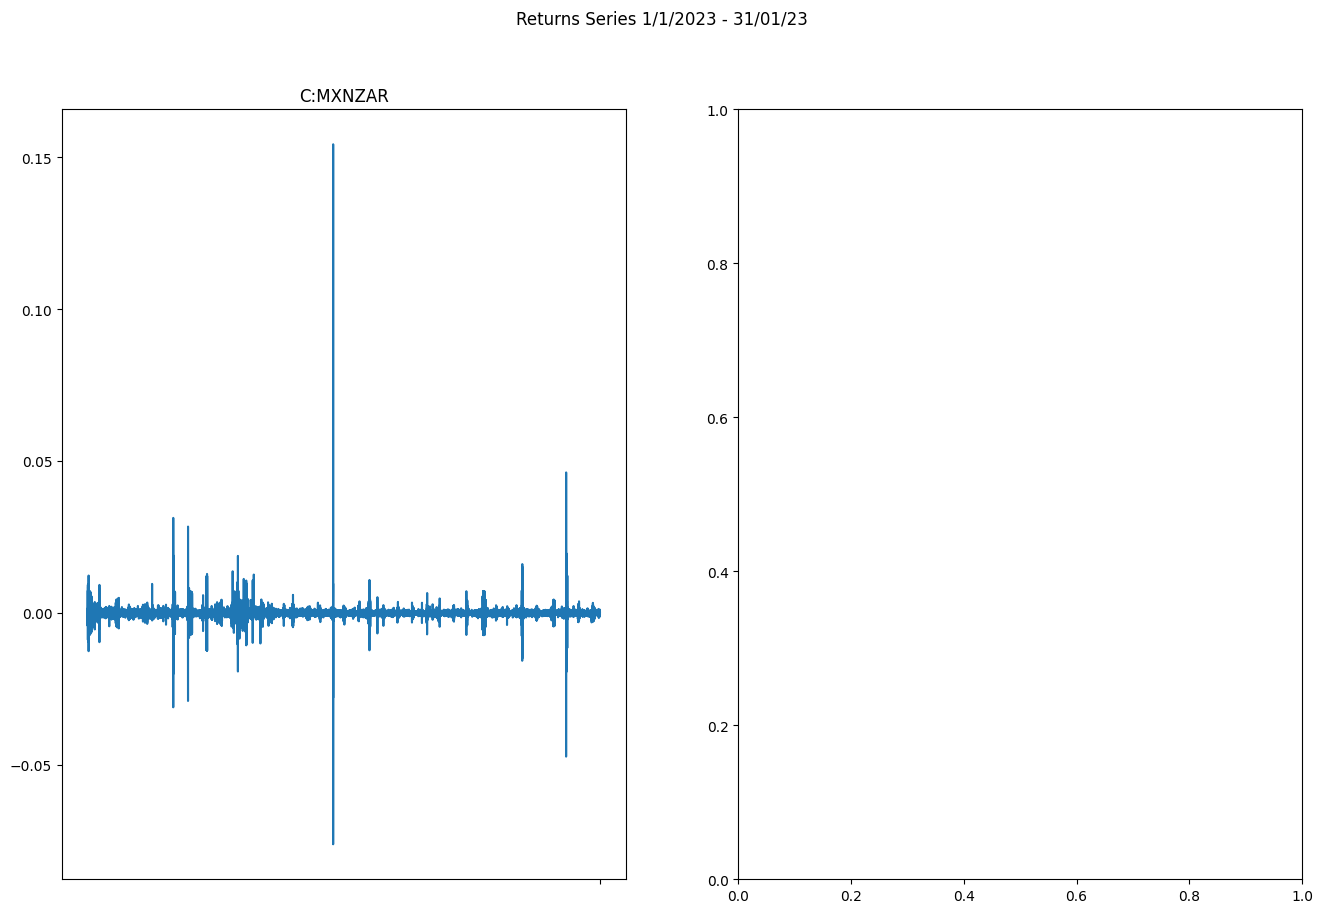

In [85]:
pg_tickers = ["C:MXNZAR"]
fx_pairs_dict = get_fx_pairs_data(pg_tickers)
formatted_fx_dict = format_fx_pairs(fx_pairs_dict)
fx_pairs_str_ind = create_str_index(formatted_fx_dict)
fx_returns_dict = create_returns_series(fx_pairs_str_ind) 
plot_returns_series(fx_returns_dict)

In [86]:
fx_pairs_str_ind["C:MXNZAR"]

,v,vw,o,c,h,l,n,rets
t,,,,,,,,
2023-01-01-18-04-00,1,0.8665,0.866530,0.866530,0.866530,0.866530,1,NaN
2023-01-01-22-00-00,2,0.8677,0.867731,0.867731,0.867731,0.867731,2,0.001386
2023-01-01-23-00-00,3,0.8650,0.864110,0.864150,0.866781,0.864110,3,-0.004127
2023-01-01-23-01-00,1,0.8640,0.863950,0.863950,0.863950,0.863950,1,-0.000231
2023-01-01-23-02-00,1,0.8640,0.863950,0.863950,0.863950,0.863950,1,0.000000
...,...,...,...,...,...,...,...,...
2023-03-10-09-59-00,219,1.0037,1.003209,1.003617,1.004369,1.002585,219,0.001128
2023-03-10-10-00-00,201,1.0041,1.004076,1.003940,1.004371,1.003202,201,0.000322
2023-03-10-10-01-00,157,1.0038,1.003800,1.003709,1.004075,1.003203,157,-0.000230


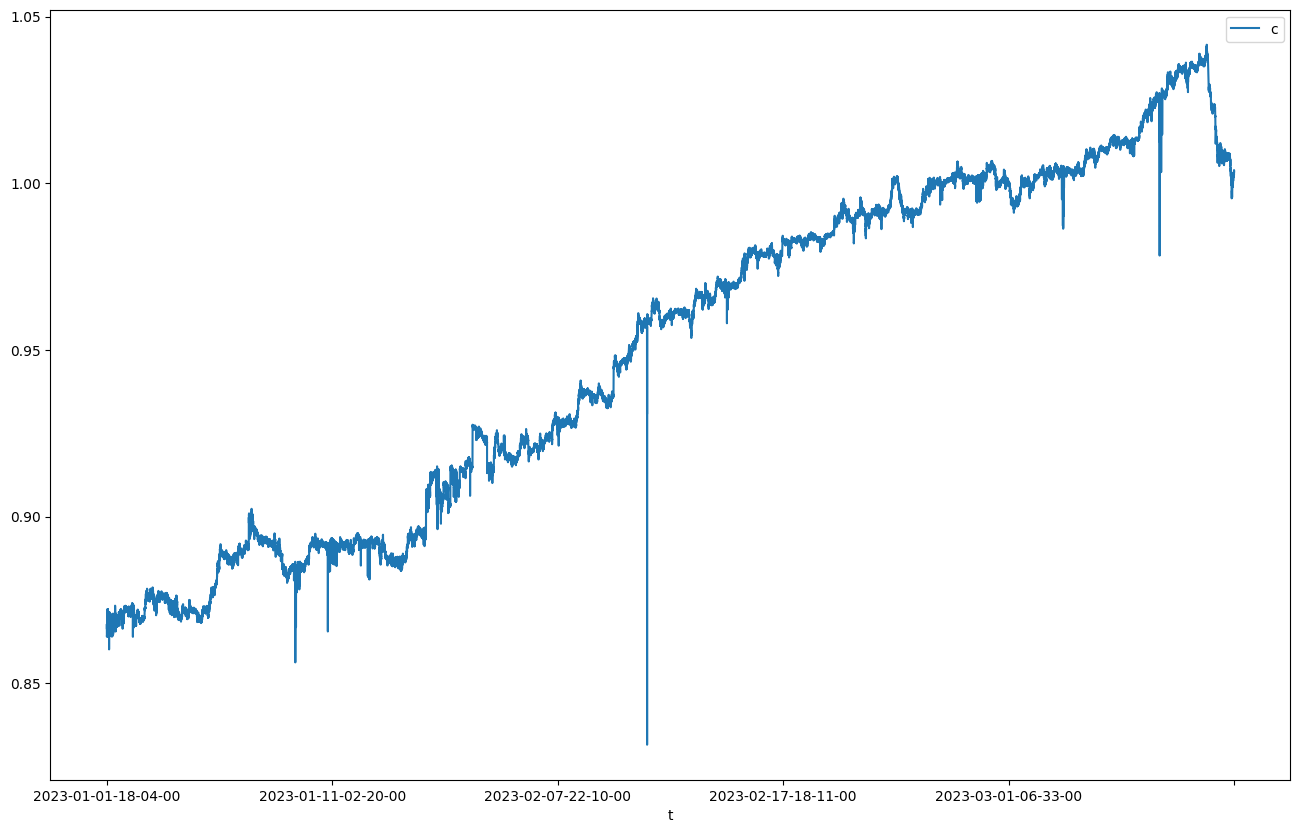

In [79]:
for pair in formatted_fx_dict:
    fx_pairs_str_ind[pair].plot(y='c', figsize=(16, 10)) 

In [58]:
def create_realized_vol(pairs_rets_dict):
    for pair in pairs_rets_dict:
        pairs_rets_dict[pair]['realized_vol'] = pairs_rets_dict[pair]['rets'].rolling(30).std()
    return pairs_rets_dict 

def plot_realized_vol(fx_pairs_str_ind):
    fig, ax = plt.subplots(1,2, figsize=(16, 10), squeeze=False)

    for idx, fxpair in enumerate(fx_pairs_str_ind.keys()):
        row = (idx//2)
        col = (idx%2)
                    
        ax[row][col].plot(fx_pairs_str_ind[fxpair].index, fx_pairs_str_ind[fxpair]['realized_vol'])
        ax[row][col].set_xticks('')
        ax[row][col].set_title(fxpair)
    fig.suptitle("Realized Vol Series 1/1/2023 - 10/01/23")
    plt.show() 



2024-04-15 22:19:58,782 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-15 22:20:01,365 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


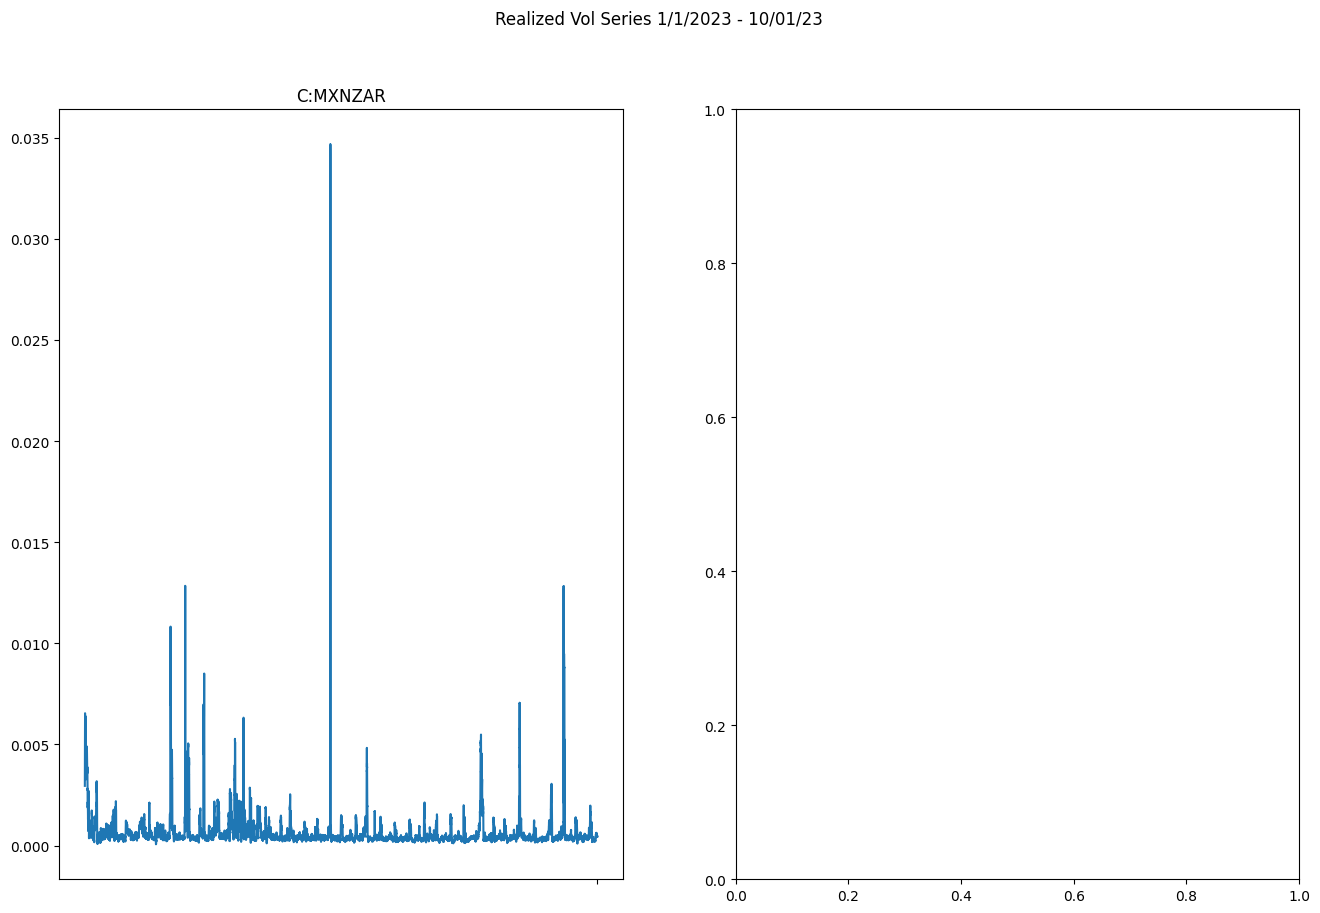

In [80]:
fx_pairs_str_ind = create_realized_vol(fx_returns_dict)
plot_realized_vol(fx_pairs_str_ind)

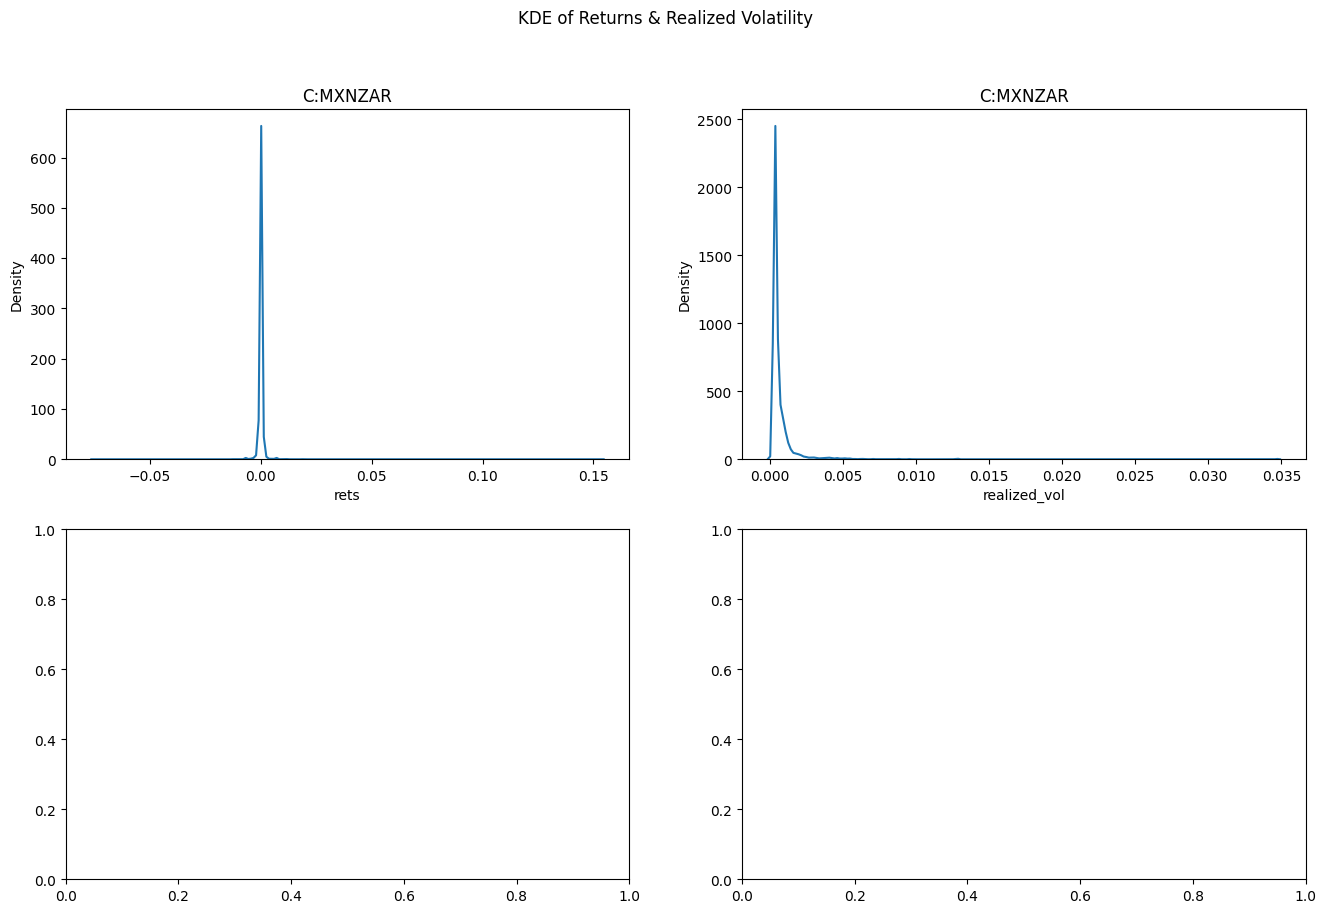

In [81]:

import seaborn as sns
fig, ax = plt.subplots(2,2, figsize=(16, 10), squeeze=False)
y_data = ['rets', 'realized_vol']
for idx, fxpair in enumerate(fx_pairs_str_ind.keys()):
    for idx2, dfcol in enumerate(y_data):
        row = (idx)
        col = (idx2%2)
        sns.kdeplot(fx_pairs_str_ind[fxpair][dfcol], ax=ax[row][col], bw_adjust=0.5)
        ax[row][col].set_title(fxpair)
fig.suptitle("KDE of Returns & Realized Volatility")
plt.show() 

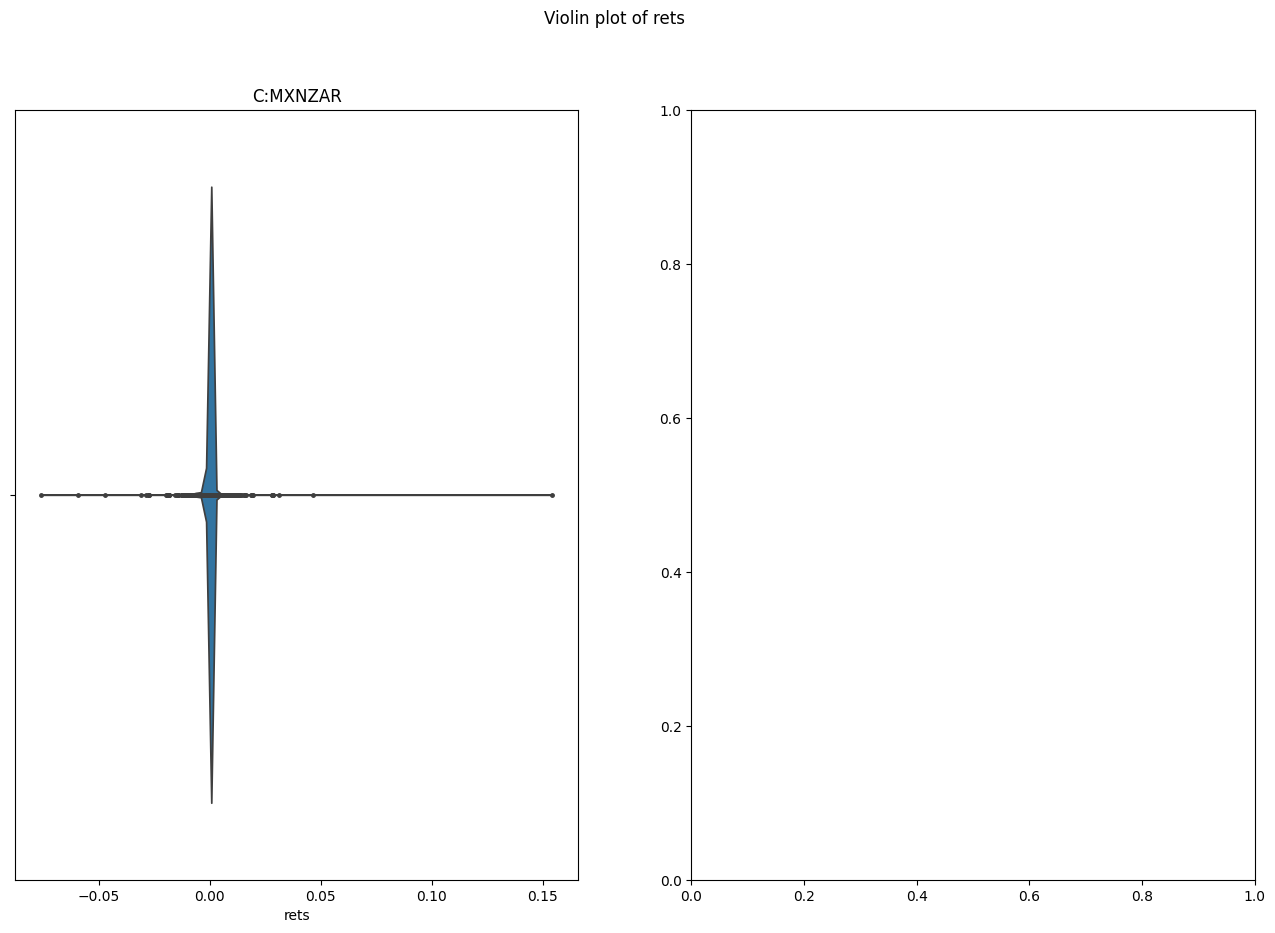

In [82]:
fig, ax = plt.subplots(1,2, figsize=(16, 10), squeeze=False)

for idx, fxpair in enumerate(fx_pairs_str_ind.keys()):
    row = (idx//2)
    col = (idx%2)
    sns.violinplot(x='rets', data=fx_pairs_str_ind[fxpair], ax=ax[row][col], inner='point')
    ax[row][col].set_title(fxpair)
fig.suptitle("Violin plot of rets")
plt.show() 

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming fx_pairs_str_ind['EURUSD'] is a DataFrame with 'rets' and 'realised_vol'
data = fx_pairs_str_ind['C:MXNZAR']
data['prev_rets'] = data['rets'].shift(1)
data['prev_realized_vol'] = data['realized_vol'].shift(1)
data.dropna(inplace=True)  # Removing rows with NaN values due to shifting

# Features and target
X = data[['prev_rets', 'prev_realized_vol']]
y = data['realized_vol']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Grid search for parameter tuning
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Best parameters: {'svr__C': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Mean Squared Error: 0.00028011257451300266
